


# Machine Learning

There are four sections below, corresponding to coding assignments. Implement and test.



# Decision Tree: Infogain



In [ ]:
'''
Decision tree: Infogain

- implement the functions in this code for the infogain problem.

'''

import math
import numpy as np

#--------------------------
# my_log function: implement this and use it in entropy()
#--------------------------
def my_log(val):
  if val == 0:
    return 0

  # must take care of the val=0 case.
  # - right now it will cause an error when my_log(0) is called.
  return math.log2(val)


#--------------------------
# entropy function: implement this and use it in infogain()
#--------------------------
def entropy(pos_neg):
  pos = pos_neg[0]
  neg = pos_neg[1]
  total = pos + neg

  if total == 0: # avoid division by zero
      return 0

  prob_pos = pos / total if pos != 0 else 0
  prob_neg = neg / total if neg != 0 else 0

  # Debugging print statements
  print('entropy() called with pos_neg:', pos_neg)
  print(' prob_pos =', prob_pos, 'prob_neg =', prob_neg)


  # Compute and return entropy
  return -prob_pos * my_log(prob_pos) - prob_neg * my_log(prob_neg)

#--------------------------
# infogain function: define this and test
#--------------------------
def infogain (before, after):

  print('infogain() called with before:', before, 'after:', after)

  # 1. Entropy before split
  initial_entropy = entropy(before)
  print(' Initial entropy:', initial_entropy)

  # 2. Entropy after split
  total_samples = sum([sum(split) for split in after])
  weighted_entropy = sum([(sum(split) / total_samples) * entropy(split) for split in after])

  # 3. Compute information gain
  gain = initial_entropy - weighted_entropy
  print(' Weighted entropy after split:', weighted_entropy)

  # 4. Return gain
  return gain

#--------------------------
# test entropy
#--------------------------
print(entropy([10,10]))
print(entropy([2,5]))

#--------------------------
# test infogain
#--------------------------
pre = [6,6]
post  = [ [0,2], [4,0], [2,4] ]
print('\n\nFinal Answer: ')
print(infogain(pre, post))

entropy()
 prob_pos = 0.5
None
entropy()
 prob_pos = 0.2857142857142857
None



infogain()
entropy()
 prob_pos = 0.5
None
entropy()
 prob_pos = 0.0
None
entropy()
 prob_pos = 1.0
None
entropy()
 prob_pos = 0.3333333333333333
None
None


In [ ]:
# Add your test code here, for the homework questions

pre_patrons = [6, 6] # 6 positives, 6 negatives

#patrons
post_patrons = [[0, 2], # None: 0 positives, 2 negatives
                [4, 0], # Some: 4 positives, 0 negatives
                [2, 4]] # Full: 2 positives, 4 negatives
info_gain_patrons = infogain(pre_patrons, post_patrons)
print("Information Gain for Patrons:", info_gain_patrons, "\n\n\n\n")


# Total counts before splits for HW table
pre = [6, 4] # 6 positives, 4 negatives

# For Type attribute
post_type = [[3, 2], # RTS: 3 positives, 2 negatives
             [3, 0], # OW: 3 positives
             [0, 2]] # BG: 2 negatives
info_gain_type = infogain(pre, post_type)

# Decision Tree


[Text(0.6, 0.8333333333333334, 'x[0] <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(0.4, 0.5, 'x[3] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.2, 0.16666666666666666, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6, 0.16666666666666666, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.5, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]')]

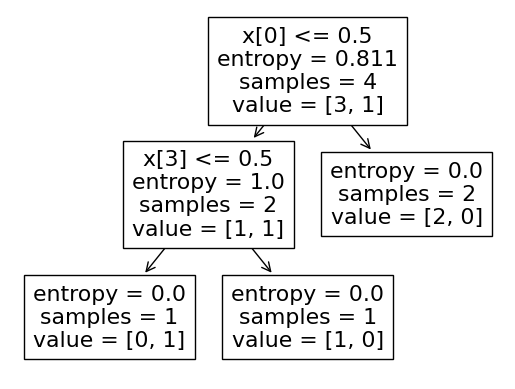

In [ ]:
# Testing scikit-learn's decision tree implementation.
#
#  - scikit-learn's decision tree only allows binary target values.

from sklearn import tree
import numpy as np

clf = tree.DecisionTreeClassifier(criterion="entropy")

# Enter your data here. Each row is an instance. Each column is the attribute.
# Set the first attribute value that appears in the table to be 0, and the next one as 1.
# - for example, for the Commute attribute, 2hr = 0, and 1hr = 1.
#
# X = [[0,0,0,0],
#      [0,0,0,1],
#      ... .... ... ]
#

# mock data, with only 4 instances
# - MODIFY this
#
# Column order: Commute, JobType, Location, StockOption
# Values:
#    Commute:     2hr=0, 1hr=1
#    JobType:     researech=0, development=1
#    Location:    westcoast=0, eastcoast=1
#    StockOption: yes=1, no=0
# Target:         N=0, Y=1
X = [[0,0,0,0],
     [0,0,0,1],
     [1,0,0,0],
     [1,1,0,0] ]

# Enter the target data (AcceptJob) here. 1 = Yes. 0 = No.
# y = [1, 1, .... ]
# - MODIFY this

y = [ 1,
     0,
     0,
     0 ]
clf = clf.fit(X, y)

# Note: value=[a,b] means "a" negative samples, and "b" positive samples [# neg = a, # pos = b].
#       *Note that this order is reversed, compared to the lecture slides, where we had [# pos, #neg], so you have to be careful.
# Note: left branch is attribute value 0, right branch = attribute value 1.
# Note: X[n] means the attribute for the n-th column (n=0 is the first column in),
#       so, for the homework problem, X[0] is Commute. X[1] is JobType, etc.

tree.plot_tree(clf)

# Check if the tree gives the correct answer for the mock dataset above.


# Neural Networks: Perceptron



Input (with bias at the end)=[ 1.  1. -1.], Target=1
Input (with bias at the end)=[ 0.  0. -1.], Target=0
Input (with bias at the end)=[ 0.  1. -1.], Target=1
Input (with bias at the end)=[ 1.  0. -1.], Target=1
number of epochs = 1
average error = 1e-05


Testing plot_decision_boundary
[-0.19230697 -0.33561736 -0.45004173]


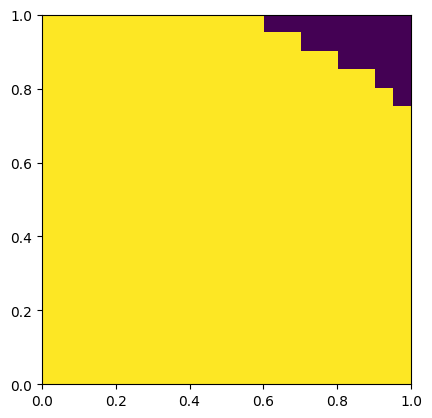

In [ ]:
'''
Implement perceptron in this code cell : implement the perceptron() function

Assumptions: 2 input, 1 output perceptron.
  Note: 1 bias unit should also be added to the input vector  (fixed value of 1.0).
        This is already done in the skeleton code.
'''

import matplotlib.pyplot as plt
import random

# example data: AND
# -input  : [x,y] values
# -target : target values
'''
  implement this:
     add more samples, for OR, XOR, etc.
'''
input  = np.array(
          [[0,0],
          [0,1],
          [1,0],
          [1,1]])
target = np.array([
          0,
          1,
          1,
          1])

BIAS = -1.0

#-----------------------------
# plot decision boundary function
#-----------------------------
def plot_decision_boundary(W):
  '''
  plot the decision boundary for weight vector W
  - fully functional
  '''

  x = np.arange(0.0, 1.0, 0.05)
  y = np.arange(1.0, 0.0, -0.05)

  xx, yy = np.meshgrid(x, y)

  output = W[0]*xx + W[1]*yy + W[2]*BIAS

  fig, ax = plt.subplots(1,1)

  ax.imshow(output>=0.0, extent=[0,1,0,1])

#-----------------------------
# perceptron function: implement this
#-----------------------------
def perceptron(inp, tgt, alpha=0.01, err_target=0.001):
  '''
  implement this

  input:
    inp : input vector array
    tgt : target output array
    alpha : learning rate, default = 0.01
    err_target : target error below which to terminate

  output: print out #epochs, error, and plot the decision boundary

  returns: Weight vector
  '''

  # compute some common sizes
  num_dat = len(tgt)
  inp_dim = len(inp[0])+1        # "+1" to add bias unit

  # add bias to input vectors
  inp = np.append(inp, BIAS*np.ones([num_dat,1]), axis=1)

  # initialize weight vector : -0.5 ~ 0.5
  W = (np.random.rand(inp_dim)-0.5)

  n = 0
  error = math.inf
  while error > err_target:

    #--------------
    # epoch
    #--------------

    # randomize input ordering
    order = np.arange(num_dat)
    np.random.shuffle(order)

    # 1. go over each input

    total_error = 0.0

    for i in order:

      print("Input (with bias at the end)=", end='')
      print(inp[i], end=', Target=')
      print(tgt[i])

      # 1.1. activate output unit

      # 1.2. compute error

      # 1.3. adjust weight, based on the error

      # 1.4. keep sum of total_error during this epoch
      # total_error = total_error + absolute value of error from 1.2

    # 2. compute error for the epoch as the mean error from the current epoch
    # error = total_error / number of samples

    # increment epoch count
    n = n + 1

    # forcefully quit, for now
    error = 0.00001

  # Done with training
  print('number of epochs = '+str(n))
  print('average error = '+str(error))

  # return weight vector
  return W

#-----------------------------
# test perceptron
#-----------------------------
W = perceptron(input, target, 0.1, 0.001)

#-----------------------------
# test decision boundary plot: white = 1, black = 0
# - Note: if you get totally white of totally black, try
#     rerunnning (sometimes more than 10 times) to get a non-trivial result.
#-----------------------------
print('\n\nTesting plot_decision_boundary')
print(W)
plot_decision_boundary(W)


In [ ]:
# Add your test code here, for the homework questions


# Gradient Descent




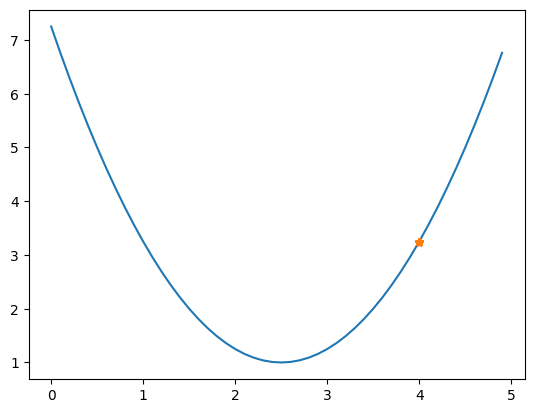

In [ ]:
# Implement your program here:

# Example program. You can modity/extend this.
#
# 1. define function
# - this is an example (quadratic function) -- you should change it to the function given in problem 4)
# - also, you need to check for the termination condition, rather than using a fixed number of steps.
def E(w):
  '''
  implement this
  '''
  return np.power(w-2.5,2) + 1      # note: np.power() can take scalar or vector as argument.

# 2. define derivative function
def dEdw(w):
  '''
  implement this
  '''
  return 2*(w-2.5)

# 3. gradient descent

w = 4     # initial value
alpha = 0.8   # learning rate  ; try alpha=0.8 and alpha=0.001

n = 100

w_t = np.zeros(n)   # this is w at step t
Ew_t = np.zeros(n)  # this is E(w) at step t

for i in range(n):
  '''
  implement this for-loop
  '''
  w_t[i]=w
  Ew_t[i]=E(w)
  # implement this: gradient descent step
  # w = ..... + alpha ...

# 4. plot E(w) and the gradient descent steps

# Note: adjust the range below based on the function you're given in problem 10.
#  - right now the x axis in the plot is 0 to 5 with a step size of 0.1.
x = np.arange(0,5,0.1)

plt.plot(x,E(x),"-",w_t,Ew_t,"*-")